## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Reading all the tables

In [2]:
holiday = pd.read_parquet('data/holidays_events.parquet.gzip')
oil = pd.read_parquet('data/oil.parquet.gzip')
sample = pd.read_parquet('data/sample_submission.parquet.gzip')
store = pd.read_parquet('data/stores.parquet.gzip')
test = pd.read_parquet('data/test.parquet.gzip')
train = pd.read_parquet('data/train.parquet.gzip')
trans = pd.read_parquet('data/transactions.parquet.gzip')

## Merging the data to form a Dataset

In [3]:
df = pd.merge(train, holiday, on='date', how='left')
df = pd.merge(df, oil, on='date', how='left')
df = pd.merge(df, trans, on=['date','store_nbr'], how='left')
df = pd.merge(df, store, on='store_nbr', how='left')
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [4]:
df['sales'].value_counts()

0.000       953741
1.000       117268
2.000        87533
3.000        69747
4.000        58922
             ...  
428.168          1
200.957          1
182.539          1
22.825           1
2419.729         1
Name: sales, Length: 379610, dtype: int64

In [5]:
df.shape

(3054348, 17)

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# df['weekday'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

### Creating a function to convert Date into Float datatype

In [7]:
#It takes the data in the date and time format and converts into float datatype

def dt64_to_float(dt64):

    year = dt64.astype('M8[Y]')
    # print('year:', year)
    days = (dt64 - year).astype('timedelta64[D]')
    # print('days:', days)
    year_next = year + np.timedelta64(1, 'Y')
    # print('year_next:', year_next)
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')
                    ).astype('timedelta64[D]')
    # print('days_of_year:', days_of_year)
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    # print('dt_float:', dt_float)
    return dt_float


df['date_float'] = dt64_to_float(df['date'].to_numpy())

In [8]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,NaN,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,NaN,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,NaN,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,NaN,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,NaN,Quito,Pichincha,D,13,2013,1,1,1,2013.0


### Describing the Statistical measures on Numeric columns

In [9]:
#This gives all the statistical measures of the all numeric columns 
df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,transactions,cluster,year,month,week,quarter,date_float
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,2.805231e+06,3.054348e+06,3.054348e+06,3.054348e+06,3054348.0,3.054348e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,1.697071e+03,8.481481e+00,2.014842e+03,6.222870e+00,25.308635,2.413652e+00,2.015316e+03
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,9.668317e+02,4.649735e+00,1.345607e+00,3.374251e+00,14.750509,1.095690e+00,1.334583e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,5.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,1.0,1.000000e+00,2.013000e+03
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,1.046000e+03,4.000000e+00,2.014000e+03,3.000000e+00,13.0,1.000000e+00,2.014162e+03
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,1.395000e+03,8.500000e+00,2.015000e+03,6.000000e+00,25.0,2.000000e+00,2.015322e+03
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,2.081000e+03,1.300000e+01,2.016000e+03,9.000000e+00,38.0,3.000000e+00,2.016473e+03
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,8.359000e+03,1.700000e+01,2.017000e+03,1.200000e+01,53.0,4.000000e+00,2.017619e+03


### Checking for the null values in the data

In [10]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

### Handling the missing values and filling it with most frequent Item

In [11]:
#It checks for the frequecy of the values in that column and replaces it with the item which has maximum frequency
x=df['type_x'].value_counts()
x=x.index[0]

In [12]:
df['type_x'].fillna(x,inplace=True)

In [13]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [14]:
locale_1=df['locale'].value_counts()
print(locale_1)
locale_name_1=locale_1.index[0]
print(locale_1)
df['locale'].fillna(locale_1,inplace=True)
df.isnull().sum()

National    261954
Local       208494
Regional     32076
Name: locale, dtype: int64
National    261954
Local       208494
Regional     32076
Name: locale, dtype: int64


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [15]:
locale_name_1=df['locale_name'].value_counts()
print(locale_name_1)
locale_name_1=locale_name_1.index[0]
print(locale_name_1)
df['locale_name'].fillna(locale_name_1,inplace=True)
df.isnull().sum()

Ecuador                           261954
Guayaquil                          19602
Riobamba                           17820
Guaranda                           16038
Latacunga                          16038
Quito                              14256
Ambato                             14256
Cuenca                             10692
Manta                               8910
Esmeraldas                          8910
Cayambe                             8910
Santo Domingo                       8910
El Carmen                           8910
Machala                             8910
Imbabura                            8910
Puyo                                8910
Libertad                            8910
Cotopaxi                            8910
Ibarra                              7128
Quevedo                             7128
Santo Domingo de los Tsachilas      7128
Santa Elena                         7128
Loja                                7128
Salinas                             7128
Name: locale_nam

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description     2551824
transferred     2551824
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [16]:
desc=df['description'].value_counts()

desc=desc.index[0]
print(desc)
df['description'].fillna(desc,inplace=True)
df.isnull().sum()

Carnaval


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description           0
transferred     2551824
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [17]:
transfer=df['transferred'].value_counts()
print(transfer)
transfer=transfer.index[0]
print(transfer)
df['transferred'].fillna(transfer,inplace=True)
df.isnull().sum()

False    486486
True      16038
Name: transferred, dtype: int64
False


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description           0
transferred           0
dcoilwtico       955152
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [18]:
dcoil=df['dcoilwtico'].value_counts()
dcoil=dcoil.index[0]
print(dcoil)
df['dcoilwtico'].fillna(dcoil,inplace=True)
df.isnull().sum()

60.01


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description           0
transferred           0
dcoilwtico            0
transactions     249117
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [19]:
transac=df['transactions'].value_counts()
print(transac)
transac=transac.index[0]
df['transactions'].fillna(transac,inplace=True)
df.isnull().sum()

1207.0    2970
1200.0    2871
1229.0    2739
1304.0    2739
1296.0    2673
          ... 
5317.0      33
4937.0      33
4475.0      33
5235.0      33
4392.0      33
Name: transactions, Length: 4993, dtype: int64


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description           0
transferred           0
dcoilwtico            0
transactions          0
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [20]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
type_x                0
locale          2551824
locale_name           0
description           0
transferred           0
dcoilwtico            0
transactions          0
city                  0
state                 0
type_y                0
cluster               0
year                  0
month                 0
week                  0
quarter               0
date_float            0
dtype: int64

In [21]:
locale_1=df['locale'].value_counts()
print(locale_1)
locale_1=locale_1.index[0]
df['locale'].fillna(locale_1,inplace=True)
df.isnull().sum()

National    261954
Local       208494
Regional     32076
Name: locale, dtype: int64


id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
transactions    0
city            0
state           0
type_y          0
cluster         0
year            0
month           0
week            0
quarter         0
date_float      0
dtype: int64

In [22]:
locale_1=df['locale_name'].value_counts()
print(locale_1)
locale_1=locale_1.index[0]
df['locale_name'].fillna(locale_1,inplace=True)
df.isnull().sum()

Ecuador                           2813778
Guayaquil                           19602
Riobamba                            17820
Guaranda                            16038
Latacunga                           16038
Quito                               14256
Ambato                              14256
Cuenca                              10692
Manta                                8910
Esmeraldas                           8910
Cayambe                              8910
Santo Domingo                        8910
El Carmen                            8910
Machala                              8910
Imbabura                             8910
Puyo                                 8910
Libertad                             8910
Cotopaxi                             8910
Ibarra                               7128
Quevedo                              7128
Santo Domingo de los Tsachilas       7128
Santa Elena                          7128
Loja                                 7128
Salinas                           

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
transactions    0
city            0
state           0
type_y          0
cluster         0
year            0
month           0
week            0
quarter         0
date_float      0
dtype: int64

In [23]:
df.head(50)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
6,6,2013-01-01,1,CELEBRATION,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
7,7,2013-01-01,1,CLEANING,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
8,8,2013-01-01,1,DAIRY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
9,9,2013-01-01,1,DELI,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


In [24]:
df.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
transactions    0
city            0
state           0
type_y          0
cluster         0
year            0
month           0
week            0
quarter         0
date_float      0
dtype: int64

In [25]:
df.head(20)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
6,6,2013-01-01,1,CELEBRATION,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
7,7,2013-01-01,1,CLEANING,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
8,8,2013-01-01,1,DAIRY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
9,9,2013-01-01,1,DELI,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


### Enconding the Catergorical Features in the dataset

In [26]:
df['type_x'].unique()

array(['Holiday', 'Work Day', 'Additional', 'Event', 'Transfer', 'Bridge'],
      dtype=object)

In [27]:
#Encoding all categorical data and ecoding with the lables form 1 to 5
df['type_x']=df['type_x'].map({'Holiday':1, 'Work Day':5, 'Additional':3, 'Event':2, 'Transfer':4, 'Bridge':6})

In [28]:
df.head(5)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,1,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,1,National,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


In [29]:
df['locale'].unique()

array(['National', 'Local', 'Regional'], dtype=object)

In [30]:
#Encoding all categorical data and ecoding with the lables form 1 to 3
df['locale']=df['locale'].map({'National':3, 'Local':1, 'Regional':2})

In [31]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,3,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,3,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,1,3,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,3,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,1,3,Ecuador,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


In [32]:
loc=df['locale_name'].unique().tolist()
print(loc)

['Ecuador', 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga', 'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas', 'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas', 'Santa Elena', 'Quito', 'Loja', 'Salinas']


In [33]:
#Encoding all location names and ecoding with the lables form 1 to 23
loc_dic={y:x for x,y in enumerate(loc)}
print(loc_dic)
df['locale_name']=df['locale_name'].map(loc_dic)
print('\n',df['locale_name'].unique())
print("\nCategorical feature 'Locale_name' has been encoded successfully\n")

{'Ecuador': 0, 'Manta': 1, 'Cotopaxi': 2, 'Cuenca': 3, 'Libertad': 4, 'Riobamba': 5, 'Puyo': 6, 'Guaranda': 7, 'Imbabura': 8, 'Machala': 9, 'Latacunga': 10, 'El Carmen': 11, 'Santo Domingo': 12, 'Cayambe': 13, 'Guayaquil': 14, 'Esmeraldas': 15, 'Ambato': 16, 'Ibarra': 17, 'Quevedo': 18, 'Santo Domingo de los Tsachilas': 19, 'Santa Elena': 20, 'Quito': 21, 'Loja': 22, 'Salinas': 23}

 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Categorical feature 'Locale_name' has been encoded successfully



In [34]:
#df.isnull().sum()
print('\n',df.transferred.unique())
df['transferred']=df['transferred'].map({False:0,True:1})
# print('\n',df['transferred'].unique())
# print("\nCategorical feature 'transferred' has been encoded successfully\n")


 [False  True]


In [35]:
print('\n',df['transferred'].unique())
print("\nCategorical feature 'transferred' has been encoded successfully\n")


 [0 1]

Categorical feature 'transferred' has been encoded successfully



In [36]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


In [37]:
print('\n Family Categoriacal Column:\n\n',df['family'].unique(),'\n')
print('\n State Categoriacal Column:\n\n',df['description'].unique(),'\n')
print('\n City Categoriacal Column:\n\n',df['city'].unique(),'\n')


 Family Categoriacal Column:

 ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD'] 


 State Categoriacal Column:

 ['Primer dia del ano' 'Carnaval' 'Recupero puente Navidad'
 'Recupero puente primer dia del ano' 'Fundacion de Manta'
 'Provincializacion de Cotopaxi' 'Fundacion de Cuenca'
 'Cantonizacion de Libertad' 'Cantonizacion de Riobamba' 'Viernes Santo'
 'Dia del Trabajo' 'Dia de la Madre-1' 'Cantonizacion del Puyo'
 'Dia de la Madre' 'Batalla de Pichincha' 'Cantonizacion de Guaranda'
 'Provincializacion de Imbabura' 'Fundacion de Machala'
 'Cantonizacion de Latacunga' 'Canton

In [38]:
#Encoding all location names and ecoding with the lables form 0 to 32
fam=df['family'].unique().tolist()
fam_dict=dict(enumerate(fam))
print('\n',fam_dict)
fam_dict={y:x for x,y in fam_dict.items()}
print('\n',fam_dict)
df['family']=df['family'].map(fam_dict)
print('\n',df['family'].unique())
print("\nCategorical feature 'family' has been encoded successfully\n")


 {0: 'AUTOMOTIVE', 1: 'BABY CARE', 2: 'BEAUTY', 3: 'BEVERAGES', 4: 'BOOKS', 5: 'BREAD/BAKERY', 6: 'CELEBRATION', 7: 'CLEANING', 8: 'DAIRY', 9: 'DELI', 10: 'EGGS', 11: 'FROZEN FOODS', 12: 'GROCERY I', 13: 'GROCERY II', 14: 'HARDWARE', 15: 'HOME AND KITCHEN I', 16: 'HOME AND KITCHEN II', 17: 'HOME APPLIANCES', 18: 'HOME CARE', 19: 'LADIESWEAR', 20: 'LAWN AND GARDEN', 21: 'LINGERIE', 22: 'LIQUOR,WINE,BEER', 23: 'MAGAZINES', 24: 'MEATS', 25: 'PERSONAL CARE', 26: 'PET SUPPLIES', 27: 'PLAYERS AND ELECTRONICS', 28: 'POULTRY', 29: 'PREPARED FOODS', 30: 'PRODUCE', 31: 'SCHOOL AND OFFICE SUPPLIES', 32: 'SEAFOOD'}

 {'AUTOMOTIVE': 0, 'BABY CARE': 1, 'BEAUTY': 2, 'BEVERAGES': 3, 'BOOKS': 4, 'BREAD/BAKERY': 5, 'CELEBRATION': 6, 'CLEANING': 7, 'DAIRY': 8, 'DELI': 9, 'EGGS': 10, 'FROZEN FOODS': 11, 'GROCERY I': 12, 'GROCERY II': 13, 'HARDWARE': 14, 'HOME AND KITCHEN I': 15, 'HOME AND KITCHEN II': 16, 'HOME APPLIANCES': 17, 'HOME CARE': 18, 'LADIESWEAR': 19, 'LAWN AND GARDEN': 20, 'LINGERIE': 21, 'LI

In [39]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,...,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
0,0,2013-01-01,1,0,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
1,1,2013-01-01,1,1,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
2,2,2013-01-01,1,2,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
3,3,2013-01-01,1,3,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0
4,4,2013-01-01,1,4,0.0,0,1,3,0,Primer dia del ano,...,1207.0,Quito,Pichincha,D,13,2013,1,1,1,2013.0


In [40]:
print('\n City Categoriacal Column:\n\n',df['city'].unique(),'\n')
print('\n State Categoriacal Column:\n\n',df['state'].unique(),'\n')
print('\n Type y Categoriacal Column:\n\n',df['type_y'].unique(),'\n')


 City Categoriacal Column:

 ['Quito' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra' 'Santo Domingo'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen'] 


 State Categoriacal Column:

 ['Pichincha' 'Cotopaxi' 'Chimborazo' 'Imbabura'
 'Santo Domingo de los Tsachilas' 'Bolivar' 'Pastaza' 'Tungurahua'
 'Guayas' 'Santa Elena' 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas'
 'Manabi'] 


 Type y Categoriacal Column:

 ['D' 'C' 'B' 'E' 'A'] 



In [41]:
city=df['city'].unique()
city_dic={y:x for x,y in enumerate(city)}
print('\n',city_dic)
df['city']=df['city'].map(city_dic)
print('\n',df['city'].unique())
print("\nCategorical feature 'City' has been encoded successfully\n")


 {'Quito': 0, 'Cayambe': 1, 'Latacunga': 2, 'Riobamba': 3, 'Ibarra': 4, 'Santo Domingo': 5, 'Guaranda': 6, 'Puyo': 7, 'Ambato': 8, 'Guayaquil': 9, 'Salinas': 10, 'Daule': 11, 'Babahoyo': 12, 'Quevedo': 13, 'Playas': 14, 'Libertad': 15, 'Cuenca': 16, 'Loja': 17, 'Machala': 18, 'Esmeraldas': 19, 'Manta': 20, 'El Carmen': 21}

 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]

Categorical feature 'City' has been encoded successfully



In [42]:
State=df['state'].unique()
State_dic={y:x for x,y in enumerate(State)}
print('\n',State_dic)
df['state']=df['state'].map(State_dic)
print('\n',df['state'].unique())
print("\nCategorical feature 'State' has been encoded successfully\n")


 {'Pichincha': 0, 'Cotopaxi': 1, 'Chimborazo': 2, 'Imbabura': 3, 'Santo Domingo de los Tsachilas': 4, 'Bolivar': 5, 'Pastaza': 6, 'Tungurahua': 7, 'Guayas': 8, 'Santa Elena': 9, 'Los Rios': 10, 'Azuay': 11, 'Loja': 12, 'El Oro': 13, 'Esmeraldas': 14, 'Manabi': 15}

 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Categorical feature 'State' has been encoded successfully



In [43]:
type_y=df['type_y'].unique()
type_dic={y:x for x,y in enumerate(type_y)}
print('\n',type_dic)
df['type_y']=df['type_y'].map(type_dic)
print('\n',df['type_y'].unique())
print("\nCategorical feature 'type_y' has been encoded successfully\n")


 {'D': 0, 'C': 1, 'B': 2, 'E': 3, 'A': 4}

 [0 1 2 3 4]

Categorical feature 'type_y' has been encoded successfully



In [44]:
print("\nCompletely Encoded Data:\n=========================================================\n")
print(df.head())


Completely Encoded Data:

   id       date  store_nbr  family  sales  onpromotion  type_x  locale  \
0   0 2013-01-01          1       0    0.0            0       1       3   
1   1 2013-01-01          1       1    0.0            0       1       3   
2   2 2013-01-01          1       2    0.0            0       1       3   
3   3 2013-01-01          1       3    0.0            0       1       3   
4   4 2013-01-01          1       4    0.0            0       1       3   

   locale_name         description  ...  transactions  city  state  type_y  \
0            0  Primer dia del ano  ...        1207.0     0      0       0   
1            0  Primer dia del ano  ...        1207.0     0      0       0   
2            0  Primer dia del ano  ...        1207.0     0      0       0   
3            0  Primer dia del ano  ...        1207.0     0      0       0   
4            0  Primer dia del ano  ...        1207.0     0      0       0   

   cluster  year  month  week  quarter  date_float  


### Generating correlation matrix for the features

In [45]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_17888\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,transferred,dcoilwtico,transactions,city,state,type_y,cluster,year,month,week,quarter,date_float
id,1.000000,3.013381e-04,1.099196e-05,0.086102,0.206032,5.078395e-02,-2.532416e-02,2.261000e-02,5.769297e-02,-6.850854e-01,-6.541198e-04,1.453217e-04,1.390793e-04,1.662394e-04,-4.369541e-05,9.777415e-01,6.668296e-02,6.710761e-02,6.594927e-02,9.999996e-01
store_nbr,0.000301,1.000000e+00,6.950983e-18,0.041273,0.007744,1.831526e-16,6.495134e-16,-1.004117e-15,4.128427e-16,-3.325224e-15,1.628802e-01,5.886759e-01,5.874486e-01,5.719704e-01,-5.928399e-02,1.982518e-14,-4.997651e-15,-5.098943e-15,-5.313102e-15,2.620842e-14
family,0.000011,6.950983e-18,1.000000e+00,-0.113986,-0.047216,8.693412e-16,-1.184382e-15,1.773149e-15,1.029721e-15,-1.805416e-14,-7.611392e-16,2.719131e-18,3.326392e-18,3.029794e-18,-2.658233e-18,1.663383e-14,9.714041e-15,9.974649e-15,9.813665e-15,1.926840e-14
sales,0.086102,4.127337e-02,-1.139864e-01,1.000000,0.428241,1.913475e-02,-2.239770e-03,5.179114e-03,-3.114104e-03,-6.546441e-02,2.247777e-01,-9.663486e-02,-9.904735e-02,1.001457e-01,3.853669e-02,8.131982e-02,2.025001e-02,1.680398e-02,1.875173e-02,8.605077e-02
onpromotion,0.206032,7.744102e-03,-4.721648e-02,0.428241,1.000000,2.292665e-02,-5.154100e-03,5.399366e-03,1.396814e-02,-1.306436e-01,3.453290e-02,-1.265841e-02,-1.353721e-02,1.249131e-02,5.701707e-03,1.989132e-01,2.560048e-02,2.234686e-02,2.486023e-02,2.059831e-01
type_x,0.050784,1.831526e-16,8.693412e-16,0.019135,0.022927,1.000000e+00,-4.474565e-02,6.040822e-02,-1.657210e-02,-5.790500e-02,7.482663e-02,-1.135520e-15,1.532858e-15,-1.119448e-15,3.629034e-17,2.757635e-02,1.065429e-01,9.008163e-02,1.048944e-01,5.077045e-02
locale,-0.025324,6.495134e-16,-1.184382e-15,-0.002240,-0.005154,-4.474565e-02,1.000000e+00,-8.529208e-01,-4.222169e-02,-1.043359e-02,-4.072809e-04,2.641290e-16,-9.112961e-16,8.437110e-16,-1.765975e-15,-1.437345e-03,-1.168394e-01,-1.130836e-01,-1.225192e-01,-2.525197e-02
locale_name,0.022610,-1.004117e-15,1.773149e-15,0.005179,0.005399,6.040822e-02,-8.529208e-01,1.000000e+00,2.002270e-02,1.240198e-02,6.612917e-03,-1.100171e-15,1.325753e-15,-1.099362e-15,1.327970e-15,-1.889672e-02,2.008532e-01,1.969150e-01,1.992131e-01,2.249664e-02
transferred,0.057693,4.128427e-16,1.029721e-15,-0.003114,0.013968,-1.657210e-02,-4.222169e-02,2.002270e-02,1.000000e+00,-2.142180e-02,-1.442907e-02,6.045440e-16,1.758598e-15,-1.521632e-15,2.374002e-15,5.649953e-02,4.770901e-03,3.131662e-02,1.677708e-02,5.767195e-02
dcoilwtico,-0.685085,-3.325224e-15,-1.805416e-14,-0.065464,-0.130644,-5.790500e-02,-1.043359e-02,1.240198e-02,-2.142180e-02,1.000000e+00,-2.372197e-02,9.104984e-15,-2.535810e-14,1.038619e-14,-2.774807e-14,-6.809405e-01,6.913373e-03,1.017551e-02,1.184369e-02,-6.852441e-01


### Generating the histogram for the correlation matrix of top Features

C:\Users\user\AppData\Local\Temp\ipykernel_17888\217575401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.iloc[:,:-1].corr()


<Axes: >

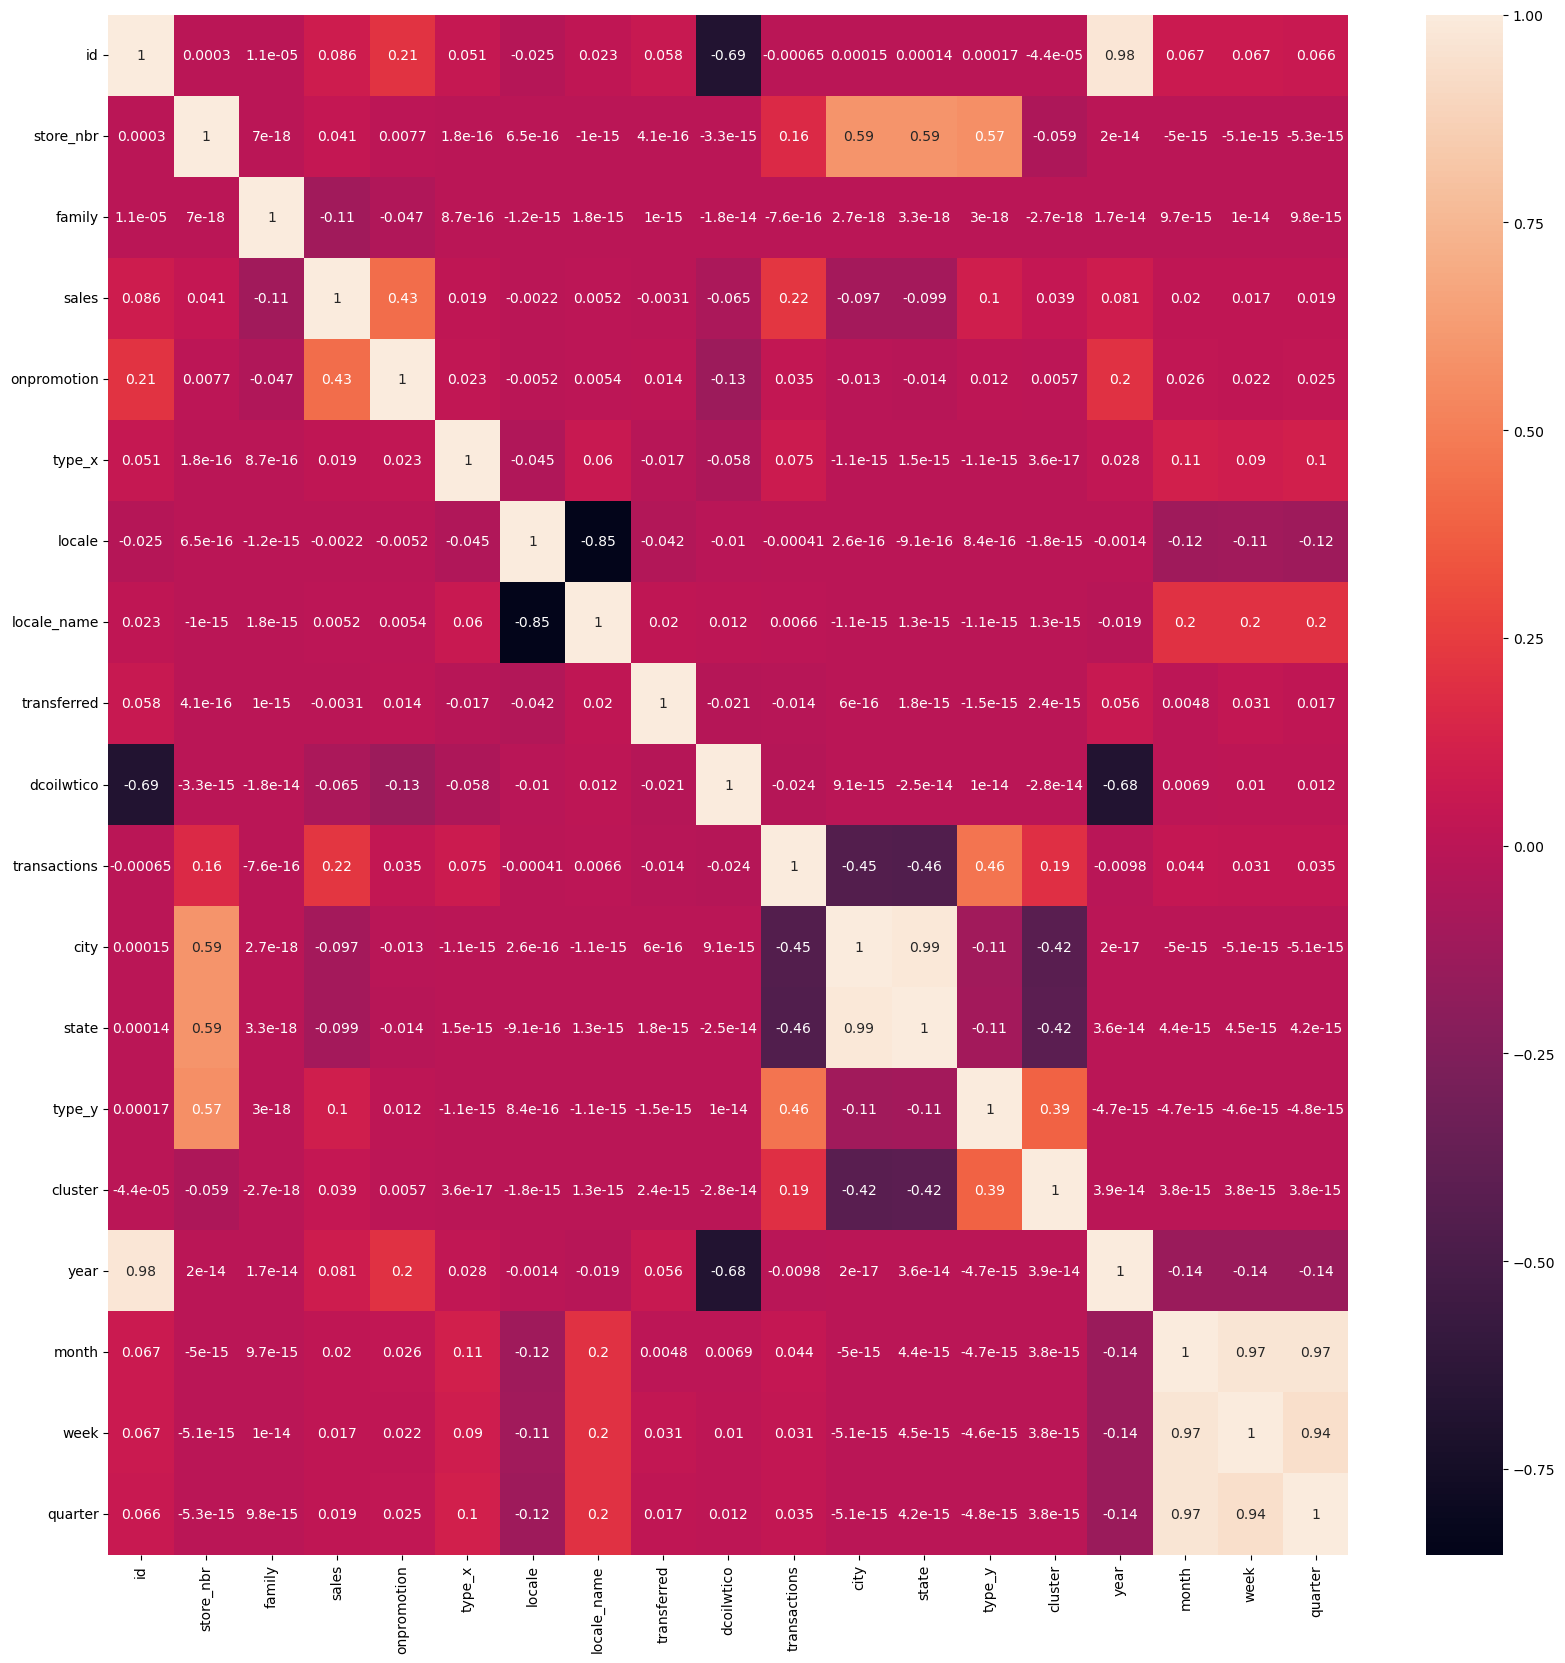

In [46]:
#Creating a histogram with all the correlation matrix of all the features 
#it will help us to find the dependency of all the features, Especially the dependent feature with independent features

import seaborn as sns
corr=df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

### ploting a histogram to see the data distribution of all the features

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'store_nbr'}>,
        <Axes: title={'center': 'family'}>,
        <Axes: title={'center': 'sales'}>],
       [<Axes: title={'center': 'onpromotion'}>,
        <Axes: title={'center': 'type_x'}>,
        <Axes: title={'center': 'locale'}>,
        <Axes: title={'center': 'locale_name'}>,
        <Axes: title={'center': 'transferred'}>],
       [<Axes: title={'center': 'dcoilwtico'}>,
        <Axes: title={'center': 'transactions'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'state'}>,
        <Axes: title={'center': 'type_y'}>],
       [<Axes: title={'center': 'cluster'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'quarter'}>],
       [<Axes: title={'center': 'date_float'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], dtype=objec

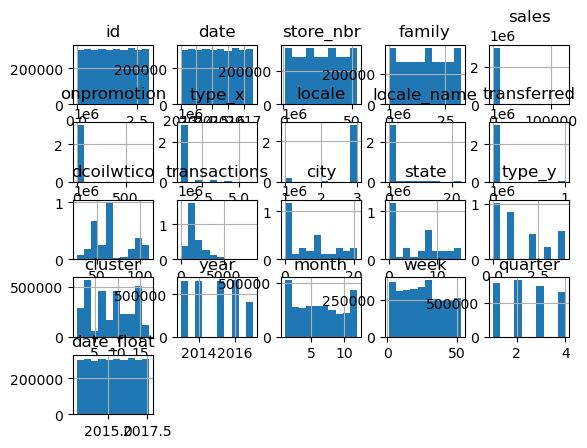

In [72]:
#It will helps to understand the data distribution of all the features and we can perform outlier analysis based on the distribution
df.hist()

### Feature Selection 

In [47]:
Column_list=df.columns.tolist()
print("\nFeatures in the Dataset :\n\n",Column_list)


Features in the Dataset :

 ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'type_x', 'locale', 'locale_name', 'description', 'transferred', 'dcoilwtico', 'transactions', 'city', 'state', 'type_y', 'cluster', 'year', 'month', 'week', 'quarter', 'date_float']


In [48]:
print("\nDropped Features are :\n================================ \nstore_nbr,id,description")
Independent_features=[ 'family', 'sales', 'onpromotion', 'type_x', 'locale', 'locale_name', 'transferred', 'transactions', 'city', 'state', 'type_y', 'cluster','date_float']
X=df[[ 'family', 'sales', 'onpromotion', 'type_x', 'locale', 'locale_name', 'transferred', 'transactions', 'city', 'state', 'type_y', 'cluster','date_float']]
print("\nInependent Features:\n====================================\n",X.columns)
y=df['sales']
print("\nDependent Features:\n==============================\nSales")


Dropped Features are :
store_nbr,id,description

Inependent Features:
 Index(['family', 'sales', 'onpromotion', 'type_x', 'locale', 'locale_name',
       'transferred', 'transactions', 'city', 'state', 'type_y', 'cluster',
       'date_float'],
      dtype='object')

Dependent Features:
Sales


In [50]:
X.head()

,family,sales,onpromotion,type_x,locale,locale_name,transferred,transactions,city,state,type_y,cluster,date_float
0,0,0.0,0,1,3,0,0,1207.0,0,0,0,13,2013.0
1,1,0.0,0,1,3,0,0,1207.0,0,0,0,13,2013.0
2,2,0.0,0,1,3,0,0,1207.0,0,0,0,13,2013.0
3,3,0.0,0,1,3,0,0,1207.0,0,0,0,13,2013.0
4,4,0.0,0,1,3,0,0,1207.0,0,0,0,13,2013.0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 28)

### Normalizing the Train and Test Data

In [68]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

### Model Building with Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators =5, random_state = 0)

# Fitting the Random Forest Regression model to the data
RFR.fit(X_train, y_train)


RandomForestRegressor(n_estimators=5, random_state=0)

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("\nAccuracy of Random Forest Regressor :\n===================================\n",RFR.score(X_test,y_test))
y_pred=RFR.predict(X_test)
print('\nMean Absolute Error:\n==========================\n', mean_absolute_error(y_test, y_pred))  
print('\nMean Squared Error:\n==========================\n',mean_squared_error(y_test, y_pred))  
print('\nRoot Mean Squared Error:\n==========================\n', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\nR2 Score:\n==========================\n', r2_score(y_test, y_pred))



Accuracy of Random Forest Regressor :
 0.9998461007377515

Mean Absolute Error:
 4.373082956143875

Mean Squared Error:
 185.289606406976

Root Mean Squared Error:
 13.612112488771755

R2 Score:
 0.9998461007377515


### Accuracy Checking with k-fold cross validition

In [71]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(RFR,X_test,y_test,cv=5)
print("\n Cross Validtion accuracy of each fold: \n=======================================\n ",cv_score)
print("\n\n\n Average of the Cross Validation Accuracy:\n=======================================\n",np.average(cv_score))


 Cross Validtion accuracy of each fold: 
  [0.99995331 0.99965285 0.99966969 0.99994668 0.9999935 ]



 Average of the Cross Validation Accuracy:
 0.9998432061718688
